## Calzada Jasso Andres Geovani *<span style = "color : Blue" > 23265539 </span>*

### **Proyecto** *<span style = "color : #E3182E" >Identificando Eventos de Nerviosismo a través de Señales HRV en Desafíos Matemáticoso</span>*

En este proyecto se realizó la detección de eventos de nerviosismo en diferentes sujetos a traves de señales HRV (Heart Rate Variability) captadas con un sensor Polar.

Los diferentes sujetos realizarón operaciones matemáticas en voz alta categorizadas en segmentos fáciles, dificiles y fáciles, con el fin de mantener un estado basal al inicio para déspues captar el estado de nerviosismo. Para las operaciones fáciles los sujetos contaron con 7 seguntos por cada opereración, para las operaciones dificiles un tiempo de 5 segundos y para las fáciles nuevamente contaron con 7 segundos para que e llegara de nuevo a un estado de tranquilidad. Cuando las personas cometieron errores con el resultado dando una retroalimentación en voz alta a manera de introducir más o menos presión dependiendo del resultado. Así al final de cada prueba se le pregunto a cada uno de los participantes si se snitieron nerviosos en una escala de 1-3 donde:

* 1 - No me senti nada nervioso durante la prueba 
* 2 - Me senti nervioso durante la prueba 
* 3 - Me senti muy nervioso durante la prueba 

Cabe mencionar que se recopilaron datos de 22 sujetos diferentes y se cuenta con un Gold Starndar de un participante que resolvio de manera correcta todas las operaciones y menciono que en ningun momento se puso nervioso. Debido a que en muchos casos es complicado tener un Gold Standard todas las compraciones en este trabajo se realizarán con respecto a este sujeto de prueba.

# **<span style="color:#0000FF">Análisis exploratorio de las señales</span>**

Debido a que cada señal HRV tiene diferentes duración y todas las comparaciones a realizarán con respecto al Gold Standar se obtendran las duraciones de todas ls señales y se recortaran con respecto a este sujeto.

#### *<span style = "color : #01A9DB" >Visualización de las señales</span>*

In [1]:
import heartpy as hp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.signal import welch
from scipy.fft import fft, fftfreq
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter1d
import pywt
import librosa
from scipy.signal import butter, filtfilt
from scipy.fft import fft

In [2]:
# Definir la función de formato
def formato_dos_cifras(x, pos):
    return f'{x:.2f}'

In [3]:
# Leemos las señales del Gold Standard
g_stndr_1_1 = np.loadtxt('Datos/gd_1.1.txt', delimiter=',')
g_stndr_1_2 = np.loadtxt('Datos/gd_1.2.txt', delimiter=',')
print(g_stndr_1_1.shape)
print(g_stndr_1_2.shape)

(215,)
(231,)


In [4]:
# Rango de sujetos y número de señales por sujeto
num_sujetos = 21
num_señales = 2

# Diccionario para almacenar las señales
señales = {}

for sujeto in range(1, num_sujetos + 1):
    for señal in range(1, num_señales + 1):
        # Nombre del archivo
        nombre_archivo = f's{sujeto}_1.{señal}.txt'    
        # Construimos el path completo al archivo
        path_completo = f'Datos/{nombre_archivo}'     
        # Leemos la señal y la almacenamos en el diccionario
        señales[f's{sujeto}_1_{señal}'] = np.loadtxt(path_completo, delimiter=',')      
        # Imprimimos el tamaño de la señal leída
        print(f's{sujeto}_1_{señal}.shape:', señales[f's{sujeto}_1_{señal}'].shape)
        
#En este momento el diccionario de señales{} tiene guardado todas las señales HRV de los sujetos, esto con el fin de optimizar el código

s1_1_1.shape: (334,)
s1_1_2.shape: (321,)
s2_1_1.shape: (401,)
s2_1_2.shape: (367,)
s3_1_1.shape: (348,)
s3_1_2.shape: (313,)
s4_1_1.shape: (265,)
s4_1_2.shape: (256,)
s5_1_1.shape: (347,)
s5_1_2.shape: (351,)
s6_1_1.shape: (225,)
s6_1_2.shape: (216,)
s7_1_1.shape: (266,)
s7_1_2.shape: (262,)
s8_1_1.shape: (229,)
s8_1_2.shape: (209,)
s9_1_1.shape: (303,)
s9_1_2.shape: (300,)
s10_1_1.shape: (190,)
s10_1_2.shape: (191,)
s11_1_1.shape: (264,)
s11_1_2.shape: (248,)
s12_1_1.shape: (279,)
s12_1_2.shape: (272,)
s13_1_1.shape: (208,)
s13_1_2.shape: (195,)
s14_1_1.shape: (222,)
s14_1_2.shape: (206,)
s15_1_1.shape: (256,)
s15_1_2.shape: (285,)
s16_1_1.shape: (319,)
s16_1_2.shape: (301,)
s17_1_1.shape: (266,)
s17_1_2.shape: (249,)
s18_1_1.shape: (268,)
s18_1_2.shape: (254,)
s19_1_1.shape: (356,)
s19_1_2.shape: (281,)
s20_1_1.shape: (284,)
s20_1_2.shape: (277,)
s21_1_1.shape: (264,)
s21_1_2.shape: (277,)


Una vez que observamos que la longitud de cada una de las señales, observamos que cada una tiene diferentes longitudes, por lo que vamos a proceder a graficar solamente 6 señales al azar para observar como es la morfología de las señales y comenzar a ver que tipo de pre-procesamiento vamos a aplicar

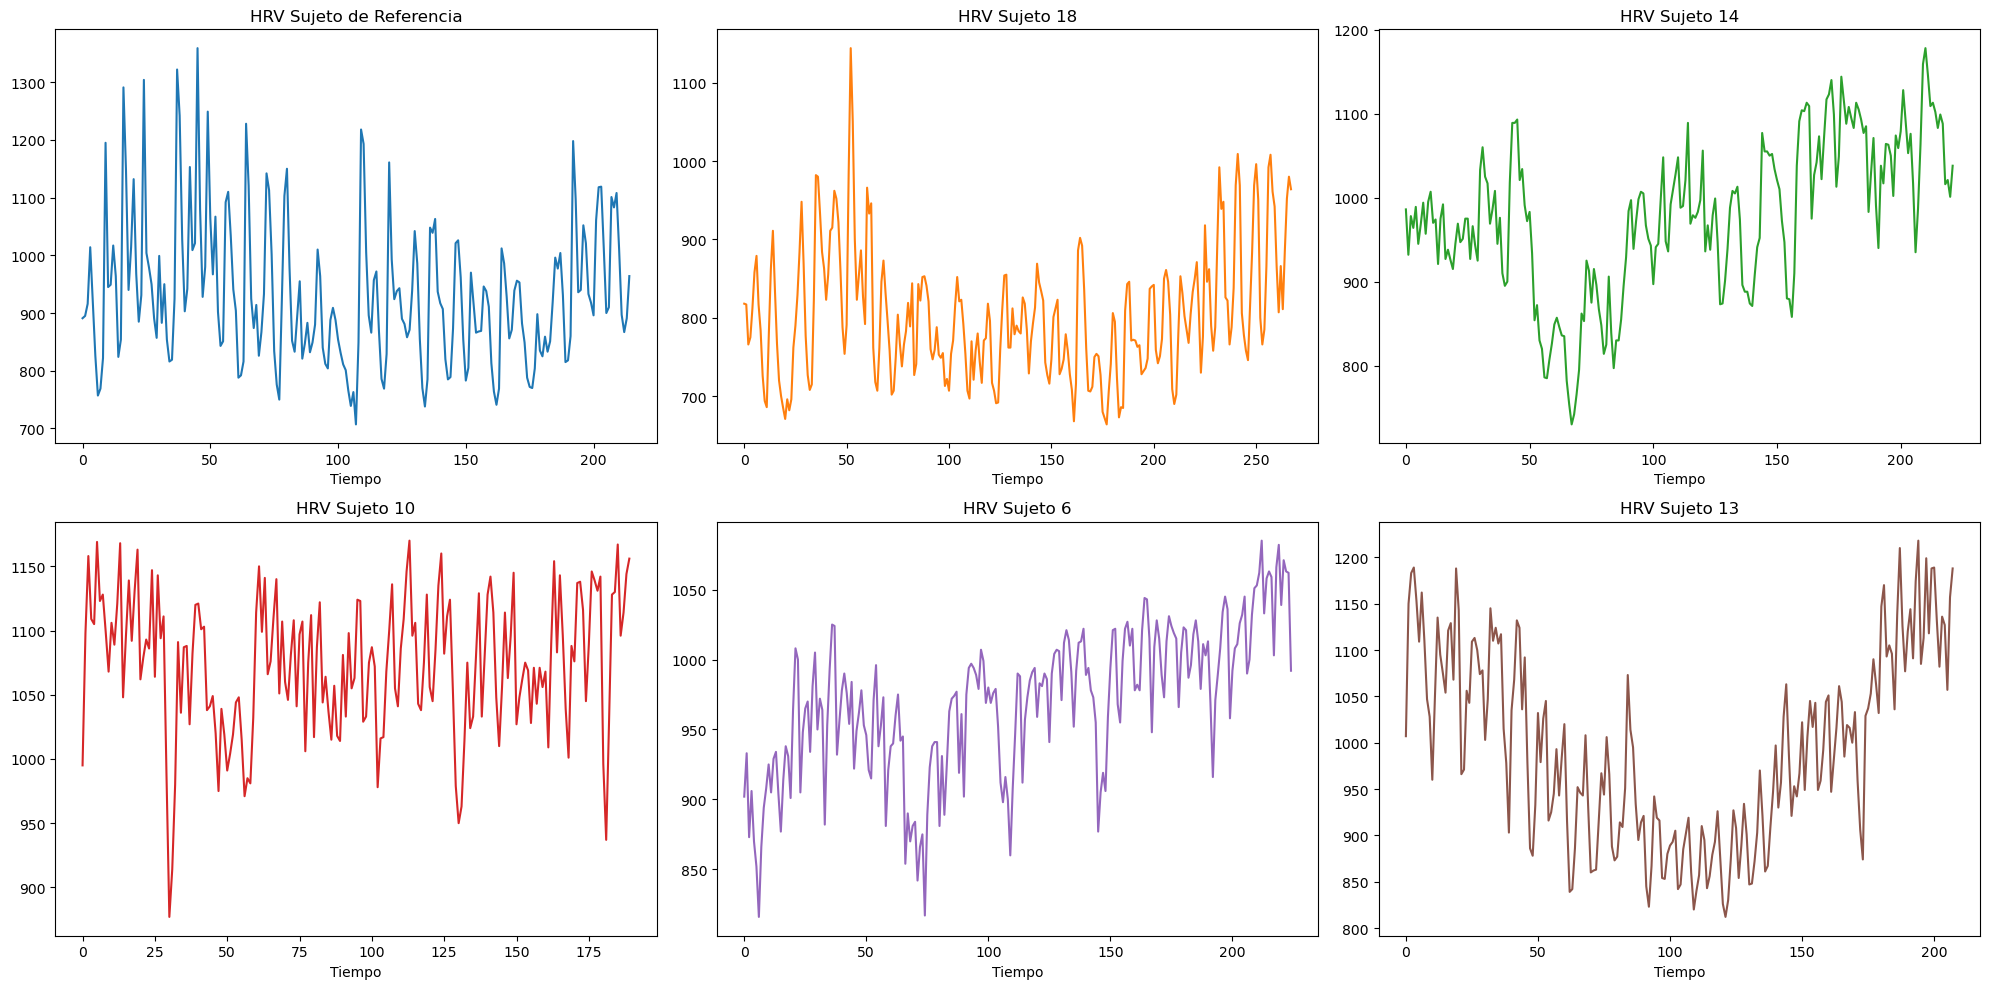

In [5]:
# Vamos a definir una frecuencia de muestreo 
sample_rate= 1

# Calcular el tiempo correspondiente a cada muestra si se conoce la frecuencia de muestreo
tiempo1 = np.arange(len(g_stndr_1_1)) / sample_rate
tiempo2 = np.arange(len(señales['s18_1_1'])) / sample_rate
tiempo3 = np.arange(len(señales['s14_1_1'])) / sample_rate
tiempo4 = np.arange(len(señales['s10_1_1'])) / sample_rate
tiempo5 = np.arange(len(señales['s6_1_1'])) / sample_rate
tiempo6 = np.arange(len(señales['s13_1_1'])) / sample_rate

#Crear un subplot de 4 columnas y 2 filas 
fig, axs = plt.subplots(2, 3, figsize=(20,10))

# Asignar datos a cada subplot
axs[0, 0].plot(tiempo1, g_stndr_1_1, 'tab:blue')
axs[0, 0].set_title('HRV Sujeto de Referencia')
axs[0, 0].set_xlabel('Tiempo')

axs[0, 1].plot(tiempo2, señales['s18_1_1'], 'tab:orange')
axs[0, 1].set_title('HRV Sujeto 18')
axs[0, 1].set_xlabel('Tiempo')

axs[0, 2].plot(tiempo3, señales['s14_1_1'], 'tab:green')
axs[0, 2].set_title('HRV Sujeto 14')
axs[0, 2].set_xlabel('Tiempo')

axs[1, 0].plot(tiempo4, señales['s10_1_1'], 'tab:red')
axs[1, 0].set_title('HRV Sujeto 10')
axs[1, 0].set_xlabel('Tiempo')

axs[1, 1].plot(tiempo5, señales['s6_1_1'], 'tab:purple')
axs[1, 1].set_title('HRV Sujeto 6')
axs[1, 1].set_xlabel('Tiempo')

axs[1, 2].plot(tiempo6, señales['s13_1_1'], 'tab:brown')
axs[1, 2].set_title('HRV Sujeto 13')
axs[1, 2].set_xlabel('Tiempo')

# Ajustar espaciado
plt.tight_layout()

# Mostrar el plot
plt.show()

Donde podemos observar que las señales se encuenran fuera de la linea, por lo que vamos a proceder a eliminar ese desfase de la linea basal por medio de un filtro tipo notch con una frecuencia de corte de 0.05. Usaremos un filtro tipo notch para eliminar o atenuar los componentes de la señal que esten cerca de estas frecuencias, con la intención de reducir la interferencia o el ruido sin afectar significativamente el resto de la señal. 

In [6]:
#Filtramos la dos señales de nuestro sujeto Gold Starndar
g_stndr_1_1 = hp.filter_signal(g_stndr_1_1, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')
g_stndr_1_2 = hp.filter_signal(g_stndr_1_2, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

In [7]:
# Filtramos todas la demas señales guardadas en el diccionario 
for clave in señales:
    # Aplica el filtro a cada señal y sobrescribe en el diccionario
    señales[clave] = hp.filter_signal(señales[clave], cutoff=0.05, sample_rate=sample_rate, filtertype='notch')


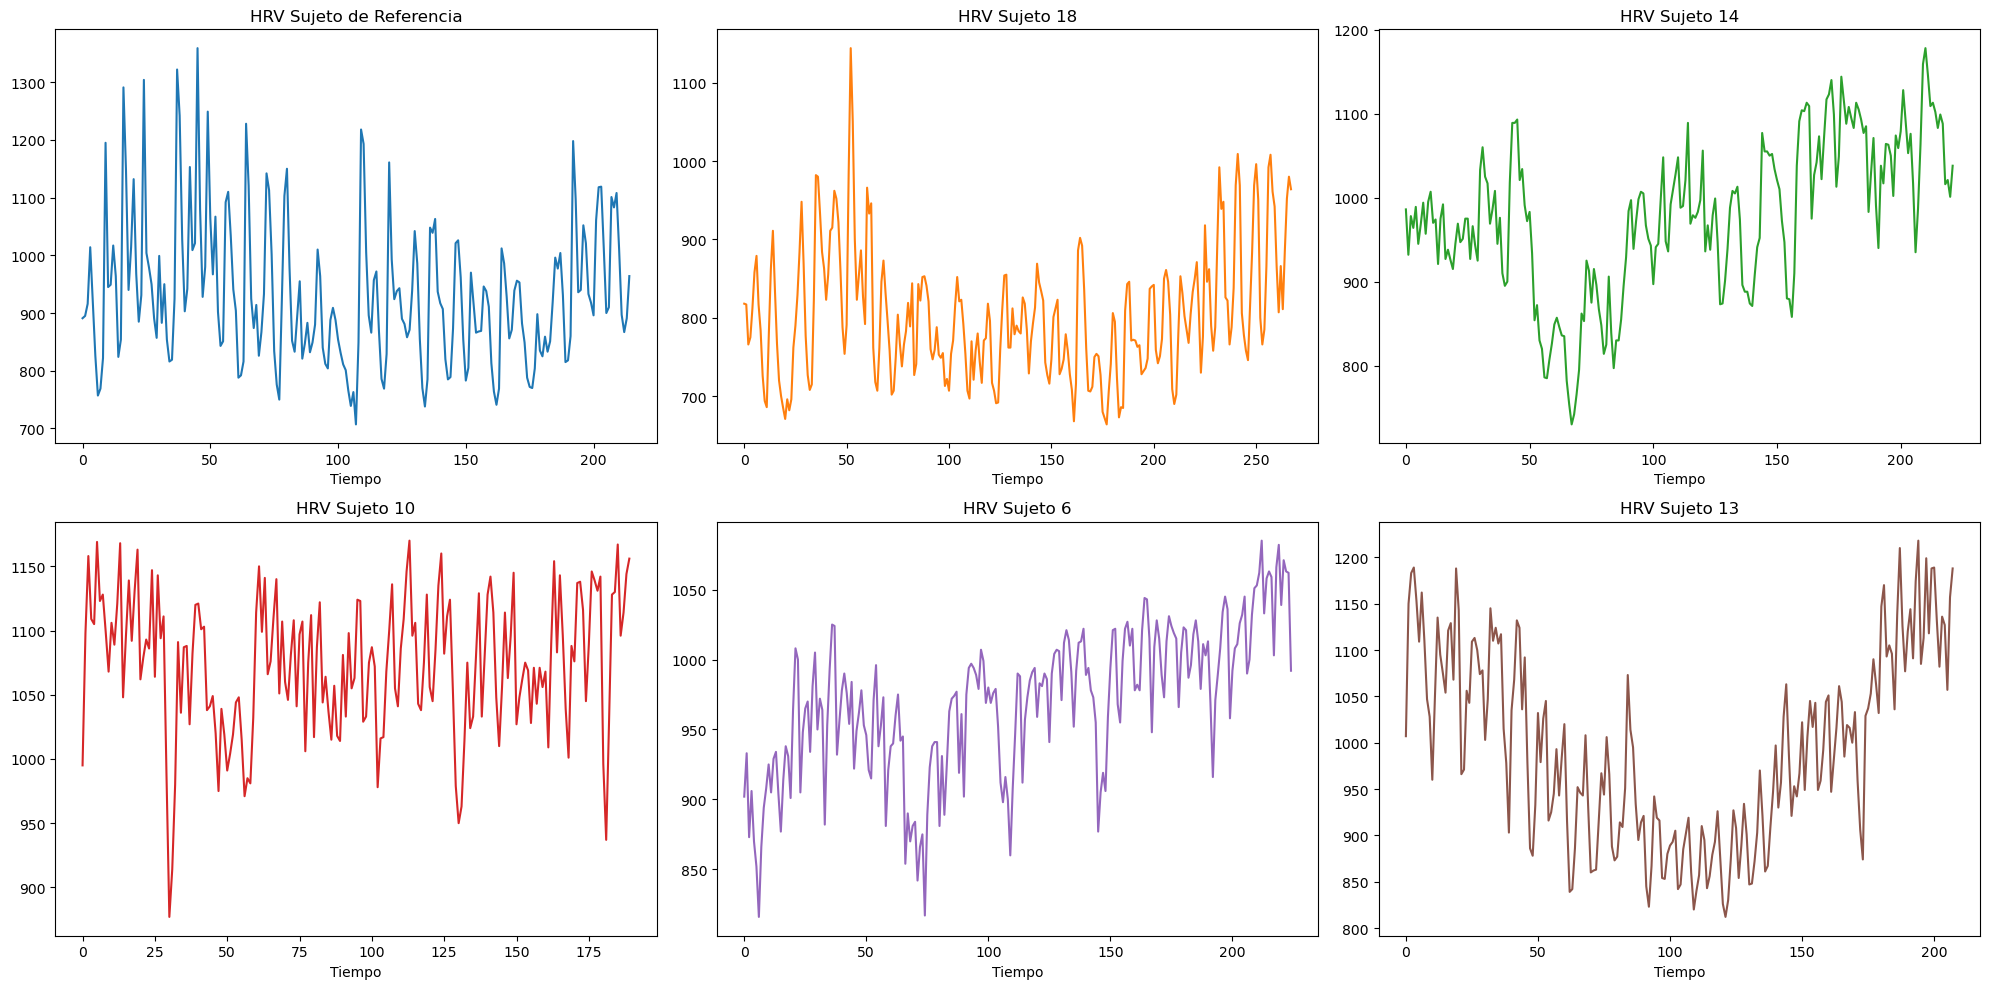

In [8]:
# Volvemos a imprimir las señales anteriores para observar el ajuste de la linea basal.

# Calcular el tiempo correspondiente a cada muestra si se conoce la frecuencia de muestreo
tiempo1 = np.arange(len(g_stndr_1_1)) / sample_rate
tiempo2 = np.arange(len(señales['s18_1_1'])) / sample_rate
tiempo3 = np.arange(len(señales['s14_1_1'])) / sample_rate
tiempo4 = np.arange(len(señales['s10_1_1'])) / sample_rate
tiempo5 = np.arange(len(señales['s6_1_1'])) / sample_rate
tiempo6 = np.arange(len(señales['s13_1_1'])) / sample_rate

#Crear un subplot de 4 columnas y 2 filas 
fig, axs = plt.subplots(2, 3, figsize=(20,10))

# Asignar datos a cada subplot
axs[0, 0].plot(tiempo1, g_stndr_1_1, 'tab:blue')
axs[0, 0].set_title('HRV Sujeto de Referencia')
axs[0, 0].set_xlabel('Tiempo')

axs[0, 1].plot(tiempo2, señales['s18_1_1'], 'tab:orange')
axs[0, 1].set_title('HRV Sujeto 18')
axs[0, 1].set_xlabel('Tiempo')

axs[0, 2].plot(tiempo3, señales['s14_1_1'], 'tab:green')
axs[0, 2].set_title('HRV Sujeto 14')
axs[0, 2].set_xlabel('Tiempo')

axs[1, 0].plot(tiempo4, señales['s10_1_1'], 'tab:red')
axs[1, 0].set_title('HRV Sujeto 10')
axs[1, 0].set_xlabel('Tiempo')

axs[1, 1].plot(tiempo5, señales['s6_1_1'], 'tab:purple')
axs[1, 1].set_title('HRV Sujeto 6')
axs[1, 1].set_xlabel('Tiempo')

axs[1, 2].plot(tiempo6, señales['s13_1_1'], 'tab:brown')
axs[1, 2].set_title('HRV Sujeto 13')
axs[1, 2].set_xlabel('Tiempo')

# Ajustar espaciado
plt.tight_layout()

# Mostrar el plot
plt.show()

# **<span style="color:#0000FF">1. Análisis en el tiempo</span>**

Una vez que se elimino la linea basal de las señal, como ya lo mencionamos anteriormente vamos a comparar cada una de las señales con nuestro Gold Starndard, por lo que vamos a graficar en este caso las señales de todos los sujetos.

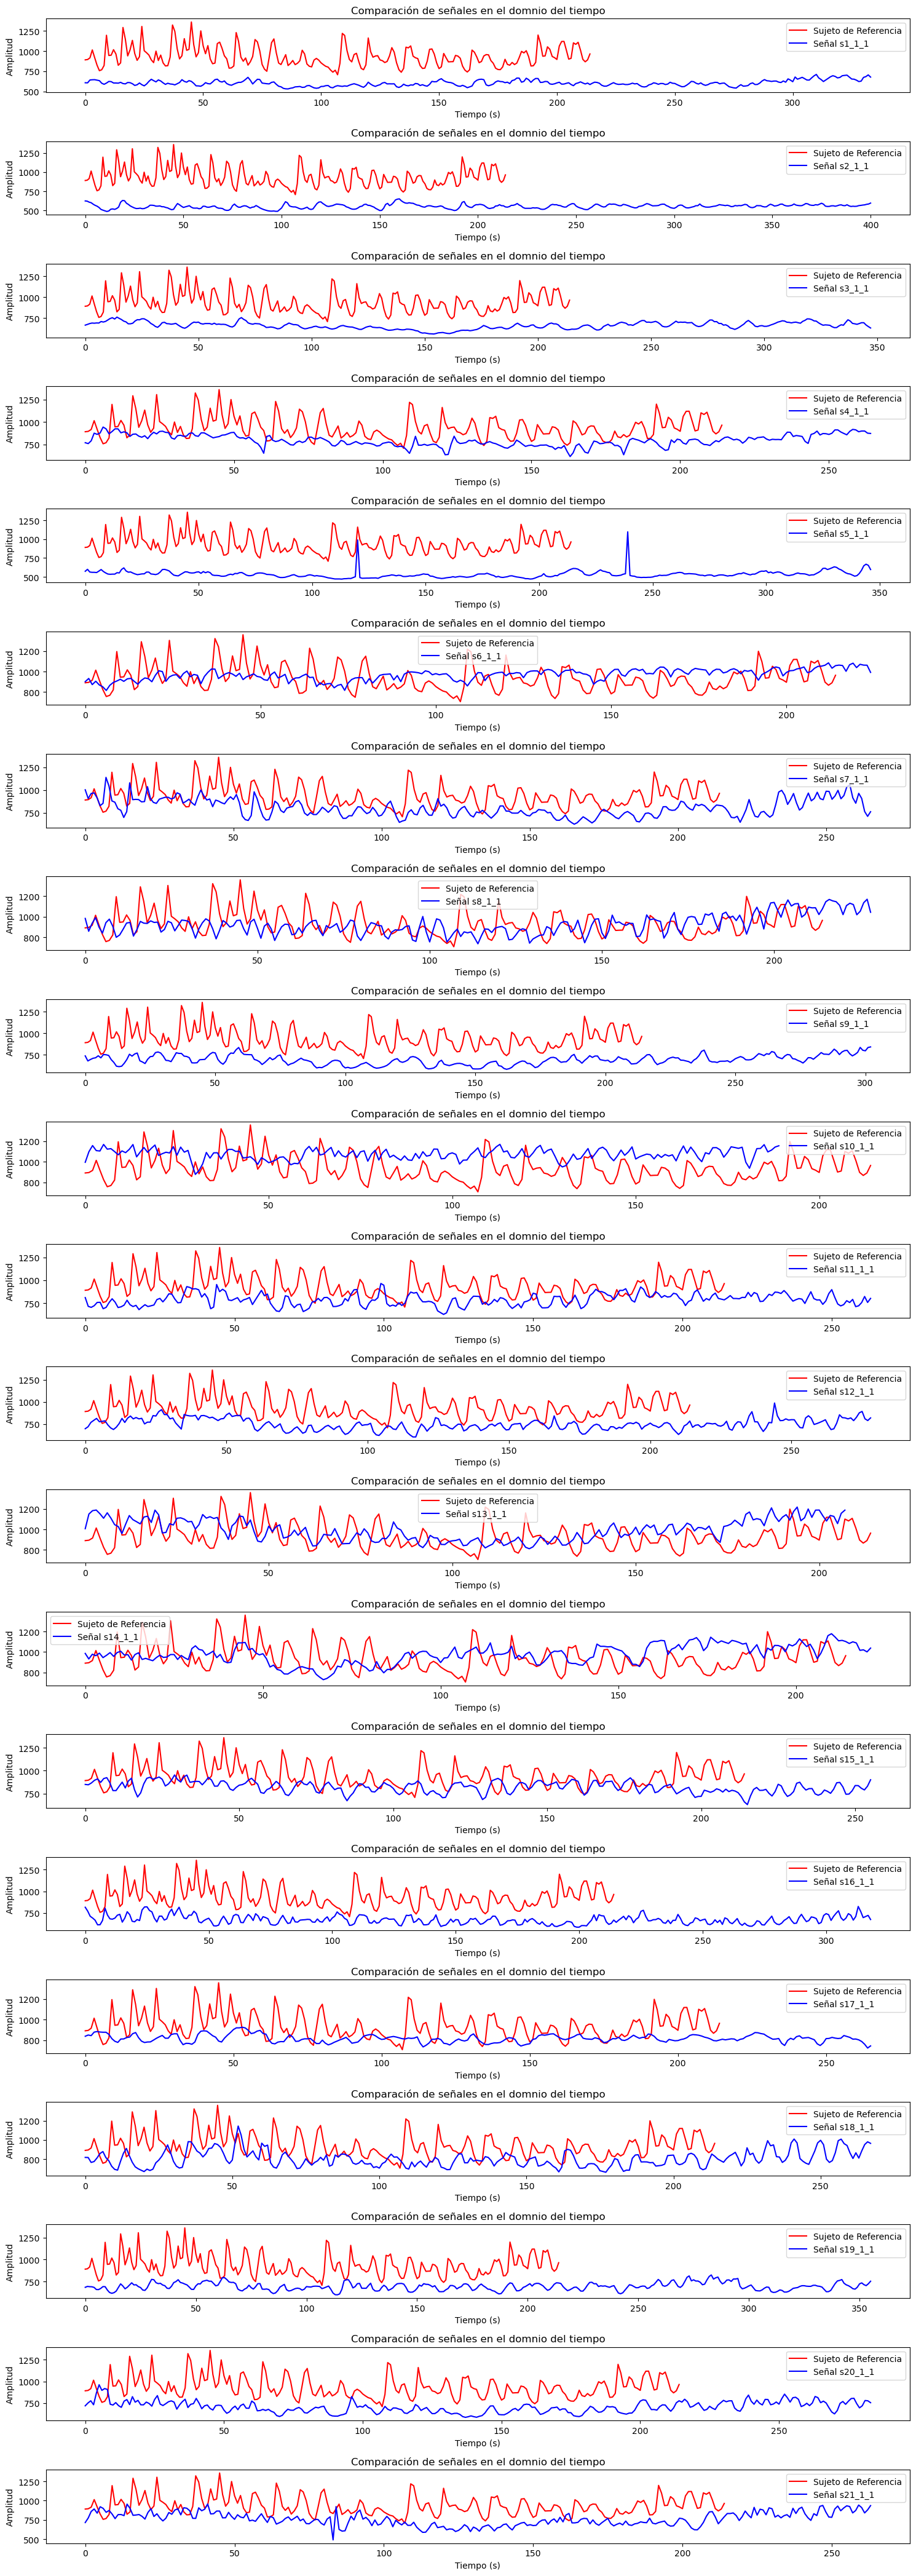

In [9]:
# Número de sujetos
num_sujetos = 21

# Crear una figura para los subplots
plt.figure(figsize=(15, 2 * num_sujetos))  # Ajusta el tamaño de la figura según el número de subplots

for sujeto in range(1, num_sujetos + 1):
    # Construye la clave para el primer estudio de cada sujeto
    clave = f's{sujeto}_1_1'
    
    if clave in señales:
        # Calcula el tiempo basado en la longitud de la señal actual
        tiempo = np.arange(len(señales[clave])) / sample_rate
        
        # Crea un subplot para esta señal
        plt.subplot(num_sujetos, 1, sujeto)
        plt.plot(tiempo1, g_stndr_1_1, label='Sujeto de Referencia', color = 'red')
        plt.plot(tiempo, señales[clave], label = f'Señal {clave}', color = 'blue')
        plt.title('Comparación de señales en el domnio del tiempo')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Amplitud')
        plt.legend()
        
# Ajusta el layout para evitar la sobreposición
plt.tight_layout()
plt.show()


Como podemos observar, la manera en como se presentan estas señales, no nos presenta información relevante o las gráficas se ven confusas, por lo que vamos a proceder a gráficar solamente 6 señales en el dominio del tiempo comparadas de igual manera con nuestro Gold Standard

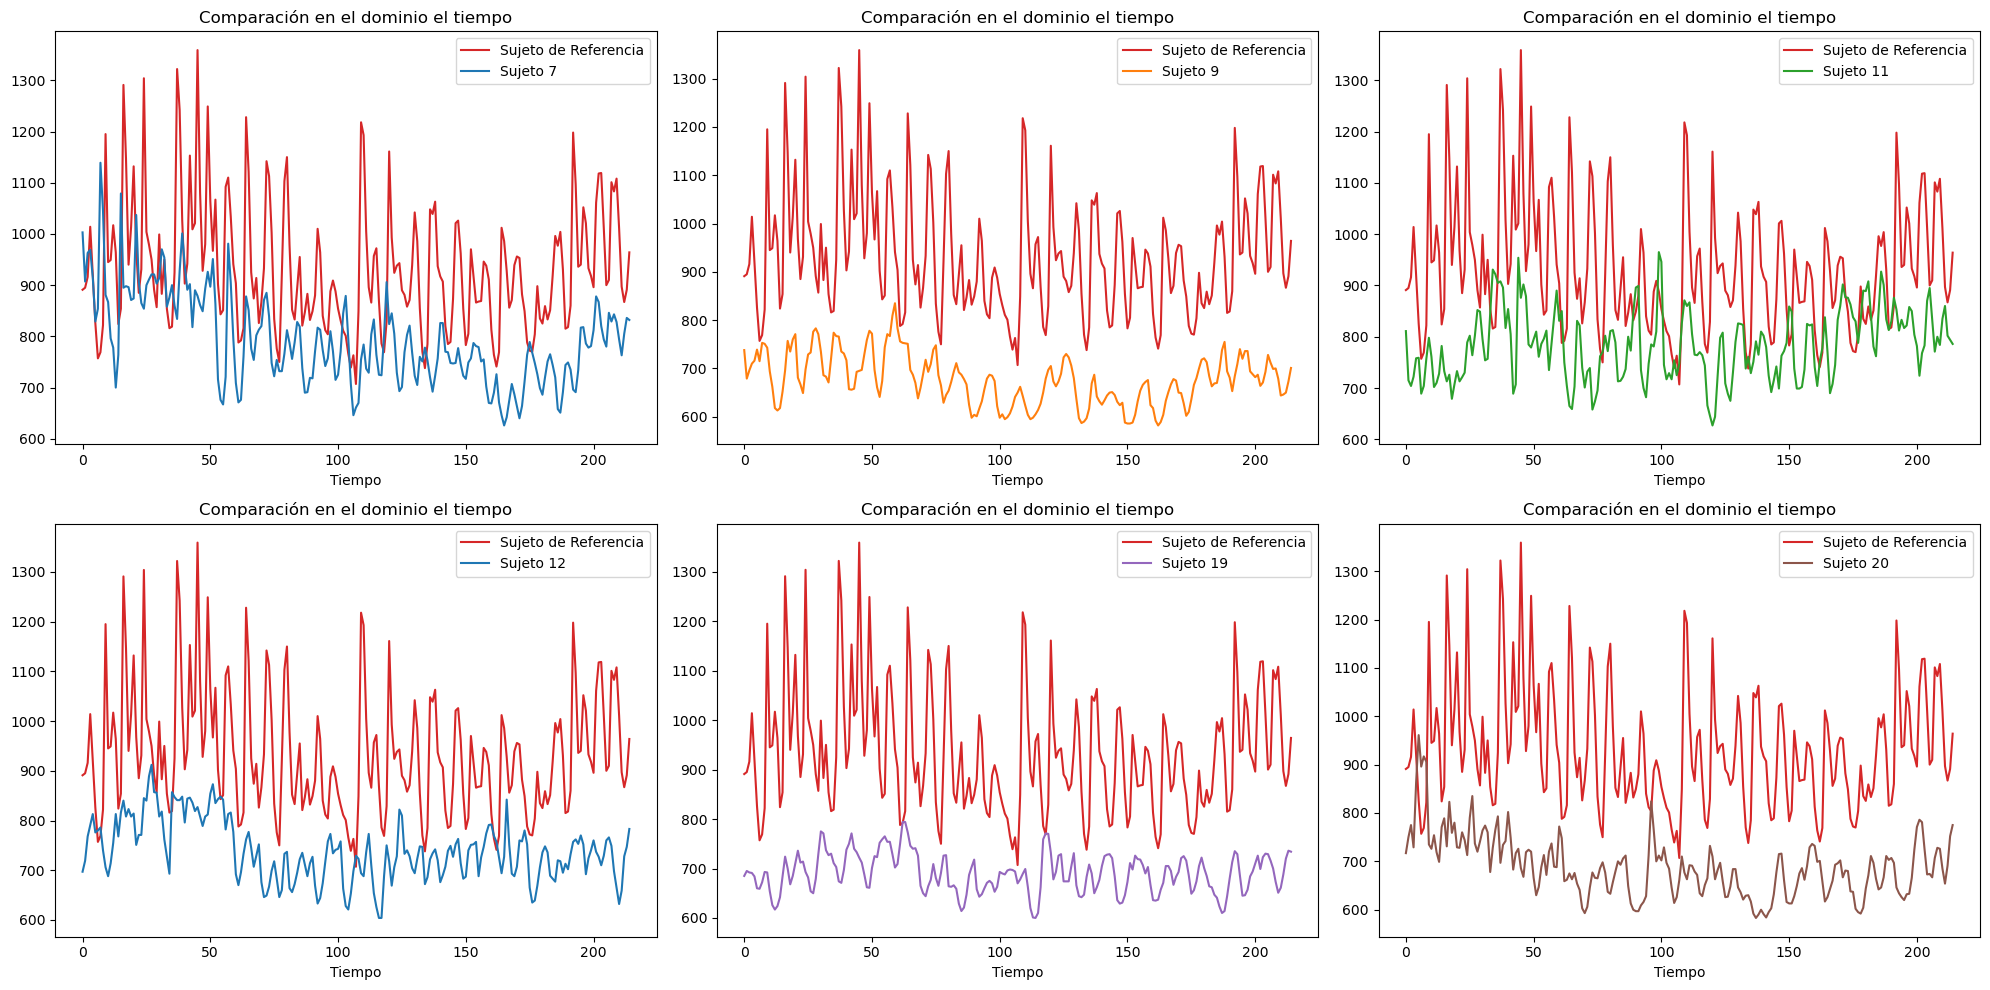

In [10]:
# Volvemos a imprimir las señales anteriores para observar el ajuste de la linea basal.

# Calcular el tiempo correspondiente a cada muestra si se conoce la frecuencia de muestreo
tiempo1 = np.arange(len(g_stndr_1_1)) / sample_rate
tiempo2 = np.arange(len(señales['s7_1_1'])) / sample_rate
tiempo3 = np.arange(len(señales['s9_1_1'])) / sample_rate
tiempo4 = np.arange(len(señales['s11_1_1'])) / sample_rate
tiempo5 = np.arange(len(señales['s12_1_1'])) / sample_rate
tiempo6 = np.arange(len(señales['s19_1_1'])) / sample_rate
tiempo7 = np.arange(len(señales['s20_1_1'])) / sample_rate

#Crear un subplot de 4 columnas y 2 filas 
fig, axs = plt.subplots(2, 3, figsize=(20,10))

# Asignar datos a cada subplot
axs[0, 0].plot(tiempo1, g_stndr_1_1, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 0].plot(tiempo2[0:215], señales['s7_1_1'][0:215], 'tab:blue', label = 'Sujeto 7')
axs[0, 0].set_title('Comparación en el dominio el tiempo')
axs[0, 0].set_xlabel('Tiempo')
axs[0, 0].legend()

axs[0, 1].plot(tiempo1, g_stndr_1_1, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 1].plot(tiempo3[0:215], señales['s9_1_1'][0:215], 'tab:orange', label = 'Sujeto 9')
axs[0, 1].set_title('Comparación en el dominio el tiempo')
axs[0, 1].set_xlabel('Tiempo')
axs[0, 1].legend()

axs[0, 2].plot(tiempo1, g_stndr_1_1, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 2].plot(tiempo4[0:215], señales['s11_1_1'][0:215], 'tab:green', label = 'Sujeto 11')
axs[0, 2].set_title('Comparación en el dominio el tiempo')
axs[0, 2].set_xlabel('Tiempo')
axs[0, 2].legend()

axs[1, 0].plot(tiempo1, g_stndr_1_1, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 0].plot(tiempo5[0:215], señales['s12_1_1'][0:215], 'tab:blue', label = 'Sujeto 12')
axs[1, 0].set_title('Comparación en el dominio el tiempo')
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].legend()

axs[1, 1].plot(tiempo1, g_stndr_1_1, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 1].plot(tiempo6[0:215], señales['s19_1_1'][0:215], 'tab:purple', label = 'Sujeto 19')
axs[1, 1].set_title('Comparación en el dominio el tiempo')
axs[1, 1].set_xlabel('Tiempo')
axs[1, 1].legend()

axs[1, 2].plot(tiempo1, g_stndr_1_1, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 2].plot(tiempo7[0:215], señales['s20_1_1'][0:215], 'tab:brown', label = 'Sujeto 20')
axs[1, 2].set_title('Comparación en el dominio el tiempo')
axs[1, 2].set_xlabel('Tiempo')
axs[1, 2].legend()

# Ajustar espaciado
plt.tight_layout()

# Mostrar el plot
plt.show()

De la gráfica anterior podemos ver que no se perciben cambios o eventos muy visibles de nerviosismo en las señales en comparación con el Gold Standar, pero vamos a realizar otro tipo de procesamiento para ver si pueden mejorar las señales. Aplicaremos un suavizado en las señales, es decir vamos a eliminar las variaciones bruscas en sus valores, procurando conservar la tendencia general. 

¿Por qué suavizar una señal?

* Eliminar ruido: El ruido son pequeñas fluctuaciones aleatorias que pueden distorsionar la información real de la señal. El suavizado ayuda a eliminar este ruido, haciendo que la señal sea más clara y precisa.
* Resaltar tendencias: El suavizado puede ayudar a identificar las tendencias generales de la señal, eliminando las pequeñas variaciones que pueden dificultar su visualización.
* Mejorar la precisión: En algunos casos, el suavizado puede mejorar la precisión de la señal, especialmente cuando se trabaja con datos medidos con instrumentos imprecisos.

## *<span style = "color : #01A9DB" >Suavizado de las señales por filtro Guassiano</span>*

En las siguientes líneas de código se va a realizar el suavizado por medio de un filtro Gaussiano, esto significa que vamos a realizar un proceso de convolución con una función Gaussiana. Este proceso tiene el efecto de promediar los valores de una señal de una manera que proporciona más peso a los valores cercanos al punto que se esta suavizando y menos peso a los valores a los valores más alejados. El resultado es una señal más suave, donde se han atenuado las fluctuaciones rápidas o el ruido, pero se preservan las tendencias o características generales de la señal. El suanizado en este proyecto nos funciona muy bien para realizar un análisis por medio del dominio del tiempo o bien para preparar una señal para otro tipo de análisis más profundo.

En las líneas de código se presenta lo siguiente:

* gaussian_filter1d: Es una función que aplica un filtro Gaussiano a una señal unidimensional. Este tipo de filtro es utilizado para suavizar la señal, reduciendo el ruido y las fluctuaciones menores sin eliminar por completo las características importantes de la señal.

* sigma=3.5: Este parámetro controla el grado de suavizado. En el contexto de un filtro Gaussiano, sigma se refiere a la desviación estándar de la distribución Gaussiana (o campana de Gauss) que se utiliza para el suavizado. Un valor de sigma mayor resulta en un suavizado más fuerte, ya que la curva de la campana es más ancha y, por lo tanto, promedia sobre un rango más amplio de valores de la señal.

In [11]:
# Suavizamos la señal de Gold Standard 
gs_smoo = gaussian_filter1d(g_stndr_1_1, sigma=3.5)
# Suavizamos la señal de Gold Standard 
gs_smoo1 = gaussian_filter1d(g_stndr_1_2, sigma=3)

In [12]:
# Inicializamos el nuevo diccionario para almacenar las señales suavizadas
señales1 = {}

# Iteramos sobre cada señal en el diccionario original
for clave, señal in señales.items():
    # Aplicamos el suavizado gaussiano a la señal
    señal_suavizada = gaussian_filter1d(señal, sigma=2)
    # Almacenamos la señal suavizada en el nuevo diccionario
    señales1[clave] = señal_suavizada


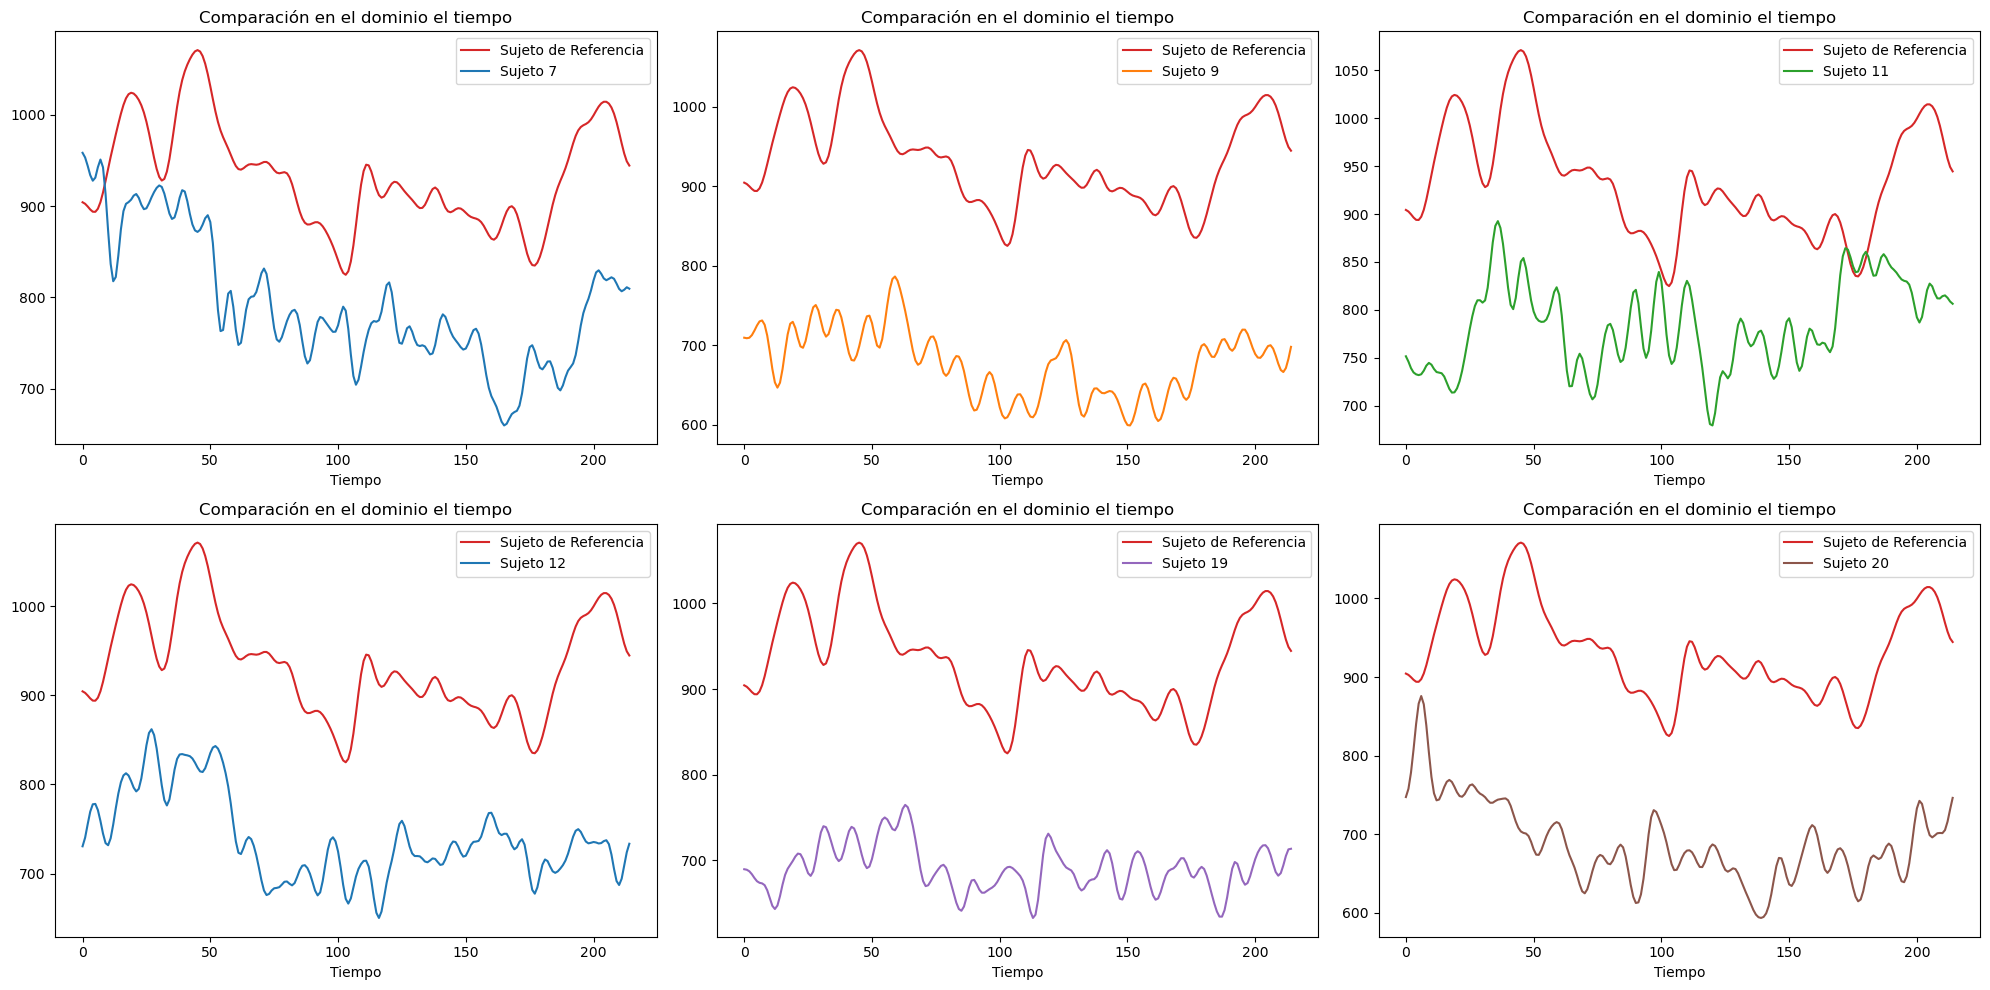

In [13]:
# Calcular el tiempo correspondiente a cada muestra si se conoce la frecuencia de muestreo
tiempo1 = np.arange(len(gs_smoo)) / sample_rate
tiempo2 = np.arange(len(señales1['s7_1_1'])) / sample_rate
tiempo3 = np.arange(len(señales1['s9_1_1'])) / sample_rate
tiempo4 = np.arange(len(señales1['s11_1_1'])) / sample_rate
tiempo5 = np.arange(len(señales1['s12_1_1'])) / sample_rate
tiempo6 = np.arange(len(señales1['s19_1_1'])) / sample_rate
tiempo7 = np.arange(len(señales1['s20_1_1'])) / sample_rate

#Crear un subplot de 4 columnas y 2 filas 
fig, axs = plt.subplots(2, 3, figsize=(20,10))

# Asignar datos a cada subplot
axs[0, 0].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 0].plot(tiempo2[0:215], señales1['s7_1_1'][0:215], 'tab:blue', label = 'Sujeto 7')
axs[0, 0].set_title('Comparación en el dominio el tiempo')
axs[0, 0].set_xlabel('Tiempo')
axs[0, 0].legend()

axs[0, 1].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 1].plot(tiempo3[0:215], señales1['s9_1_1'][0:215], 'tab:orange', label = 'Sujeto 9')
axs[0, 1].set_title('Comparación en el dominio el tiempo')
axs[0, 1].set_xlabel('Tiempo')
axs[0, 1].legend()

axs[0, 2].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 2].plot(tiempo4[0:215], señales1['s11_1_1'][0:215], 'tab:green', label = 'Sujeto 11')
axs[0, 2].set_title('Comparación en el dominio el tiempo')
axs[0, 2].set_xlabel('Tiempo')
axs[0, 2].legend()

axs[1, 0].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 0].plot(tiempo5[0:215], señales1['s12_1_1'][0:215], 'tab:blue', label = 'Sujeto 12')
axs[1, 0].set_title('Comparación en el dominio el tiempo')
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].legend()

axs[1, 1].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 1].plot(tiempo6[0:215], señales1['s19_1_1'][0:215], 'tab:purple', label = 'Sujeto 19')
axs[1, 1].set_title('Comparación en el dominio el tiempo')
axs[1, 1].set_xlabel('Tiempo')
axs[1, 1].legend()

axs[1, 2].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 2].plot(tiempo7[0:215], señales1['s20_1_1'][0:215], 'tab:brown', label = 'Sujeto 20')
axs[1, 2].set_title('Comparación en el dominio el tiempo')
axs[1, 2].set_xlabel('Tiempo')
axs[1, 2].legend()

# Ajustar espaciado
plt.tight_layout()

# Mostrar el plot
plt.show()

Una ves que realizamos el suavizado de las señales por medio del filtro Gaussiano podemos observar que las señales se han suavizado lo suficiente para realizar una comparación en el dominio del tiempo, pero existe un problema que es muy notable, las señales cuenta con un offset, por lo que el siguiente paso es eliminar esta carcaterística para poder realizar une mejor comparación.


In [14]:
# Inicializamos el nuevo diccionario para almacenar las señales ajustadas
señales_ajustadas = {}
# Calculamos el valor medio del Gold Standard suavizado
gs_mean = gs_smoo.mean()
# Iteramos sobre cada señal suavizada en el diccionario señales1
for clave, señal_suavizada in señales1.items():
    # Calculamos el valor medio de la señal suavizada
    señal_mean = señal_suavizada.mean()
    # Calculamos el offset de la señal con respecto al Gold Standard
    offset = señal_mean - gs_mean    
    # Ajustamos la señal eliminando el offset
    señal_ajustada = señal_suavizada - offset    
    # Almacenamos la señal ajustada en el nuevo diccionario
    señales_ajustadas[clave] = señal_ajustada


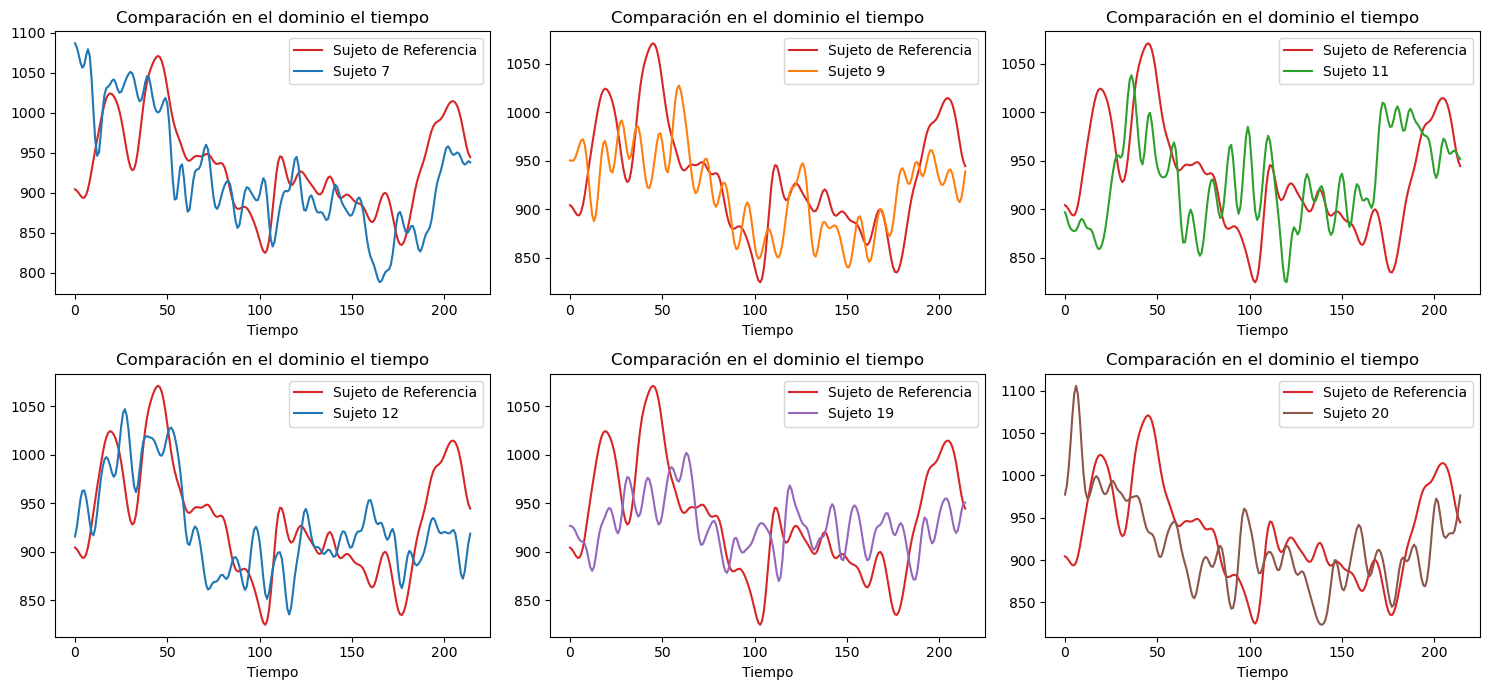

In [15]:
#Crear un subplot de 4 columnas y 2 filas 
fig, axs = plt.subplots(2, 3, figsize=(15,7))

# Asignar datos a cada subplot
axs[0, 0].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 0].plot(tiempo2[0:215], señales_ajustadas['s7_1_1'][0:215], 'tab:blue', label = 'Sujeto 7')
axs[0, 0].set_title('Comparación en el dominio el tiempo')
axs[0, 0].set_xlabel('Tiempo')
axs[0, 0].legend()

axs[0, 1].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 1].plot(tiempo3[0:215], señales_ajustadas['s9_1_1'][0:215], 'tab:orange', label = 'Sujeto 9')
axs[0, 1].set_title('Comparación en el dominio el tiempo')
axs[0, 1].set_xlabel('Tiempo')
axs[0, 1].legend()

axs[0, 2].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[0, 2].plot(tiempo4[0:215], señales_ajustadas['s11_1_1'][0:215], 'tab:green', label = 'Sujeto 11')
axs[0, 2].set_title('Comparación en el dominio el tiempo')
axs[0, 2].set_xlabel('Tiempo')
axs[0, 2].legend()

axs[1, 0].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 0].plot(tiempo5[0:215], señales_ajustadas['s12_1_1'][0:215], 'tab:blue', label = 'Sujeto 12')
axs[1, 0].set_title('Comparación en el dominio el tiempo')
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].legend()

axs[1, 1].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 1].plot(tiempo6[0:215], señales_ajustadas['s19_1_1'][0:215], 'tab:purple', label = 'Sujeto 19')
axs[1, 1].set_title('Comparación en el dominio el tiempo')
axs[1, 1].set_xlabel('Tiempo')
axs[1, 1].legend()

axs[1, 2].plot(tiempo1, gs_smoo, 'tab:red', label = 'Sujeto de Referencia')
axs[1, 2].plot(tiempo7[0:215], señales_ajustadas['s20_1_1'][0:215], 'tab:brown', label = 'Sujeto 20')
axs[1, 2].set_title('Comparación en el dominio el tiempo')
axs[1, 2].set_xlabel('Tiempo')
axs[1, 2].legend()

# Ajustar espaciado
plt.tight_layout()

# Mostrar el plot
plt.show()

Al tener el resultado de las comparaciones con respecto a nuestro Gold Standard, podemos observar que las señales ya se encuentran suavizadas y con el offset eliminado, pero realizar el análisis para observar un cambio de frecuencia como nerviosismo en los sujetos es complicado en este dominio, por lo que en este primer análisis no podemos tener una característica muy clara de la existencia de una cambio de frecuencia por algún tipo de evento externo.

Por lo que vamos a realizar diferentes análisis en el dominio de la frecuencia para tratar de percibir un cambio de frecuencia debido a estados de nerviosismo en sujetos en comparación denuestro Gold Standard.

# **<span style="color:#0000FF">2. Análisis en la frecuencia</span>**


Vamos a proceder a hacer un análisis en el dominio de la frecuencia para observar con mayor detalle que es lo que sucede con nuestra señales respecto a nuestro Gold Standard

## *<span style = "color : #01A9DB" >Espectro en la frecuencia (FFT) de las señales de HRV</span>*

La Transformada Rápida de Fourier (FFT, por sus siglas en inglés) es una herramienta fundamental en el análisis de señales, especialmente en el contexto de la Variabilidad de la Frecuencia Cardiaca (HRV, por sus siglas en inglés). La HRV se refiere a las fluctuaciones en los intervalos entre latidos consecutivos del corazón, y es un indicador importante del funcionamiento del sistema nervioso autónomo. Analizar la HRV mediante la FFT permite descomponer la señal de tiempo (las variaciones en el intervalo entre latidos) en sus componentes de frecuencia, ofreciendo así una perspectiva detallada de cómo estas fluctuaciones se distribuyen a lo largo de diferentes bandas de frecuencia.

La importancia de realizar el calculo de la FFT en señales HRV para nuestra detección de nerviosismo en diferentes sujetos es debido a la evaluación de cambios asociados al nerviosismo. El análisis espectral de la HRV puede revelar cambios en el equilibrio autonómico asociados con estados emocionales como el estrés o el nerviosismo. Por ejemplo, un aumento en la actividad simpática (que puede indicarse por cambios en la relación LF/HF) podría asociarse con un estado de mayor nerviosismo o estrés.

In [16]:
# Calcular la FFT del Gold Standard
fft_result = np.fft.fft(gs_smoo)
# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft_result), d=1/sample_rate)
# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
pf_gs = frequencies[:len(frequencies)//2]
mg_gs = np.abs(fft_result[:len(fft_result)//2])

In [17]:
# Inicializar diccionarios para almacenar las magnitudes y las frecuencias positivas de la FFT
fft_magnitudes = {}
fft_frecuencias = {}

# Iterar sobre el diccionario de señales ajustadas para calcular la FFT de cada señal
for clave, señal in señales_ajustadas.items():
    # Calcular la FFT de la señal
    fft_result = np.fft.fft(señal)
    # Calcular las frecuencias correspondientes
    frequencies = np.fft.fftfreq(len(señal), d=1/sample_rate)
    
    # Tomar solo las frecuencias positivas y sus magnitudes correspondientes
    pf = frequencies[:len(frequencies)//2]
    mg = np.abs(fft_result[:len(fft_result)//2])
    
    # Almacenar las magnitudes en el diccionario de magnitudes
    fft_magnitudes[clave] = mg
    
    # Almacenar las frecuencias positivas en el diccionario de frecuencias
    fft_frecuencias[clave] = pf

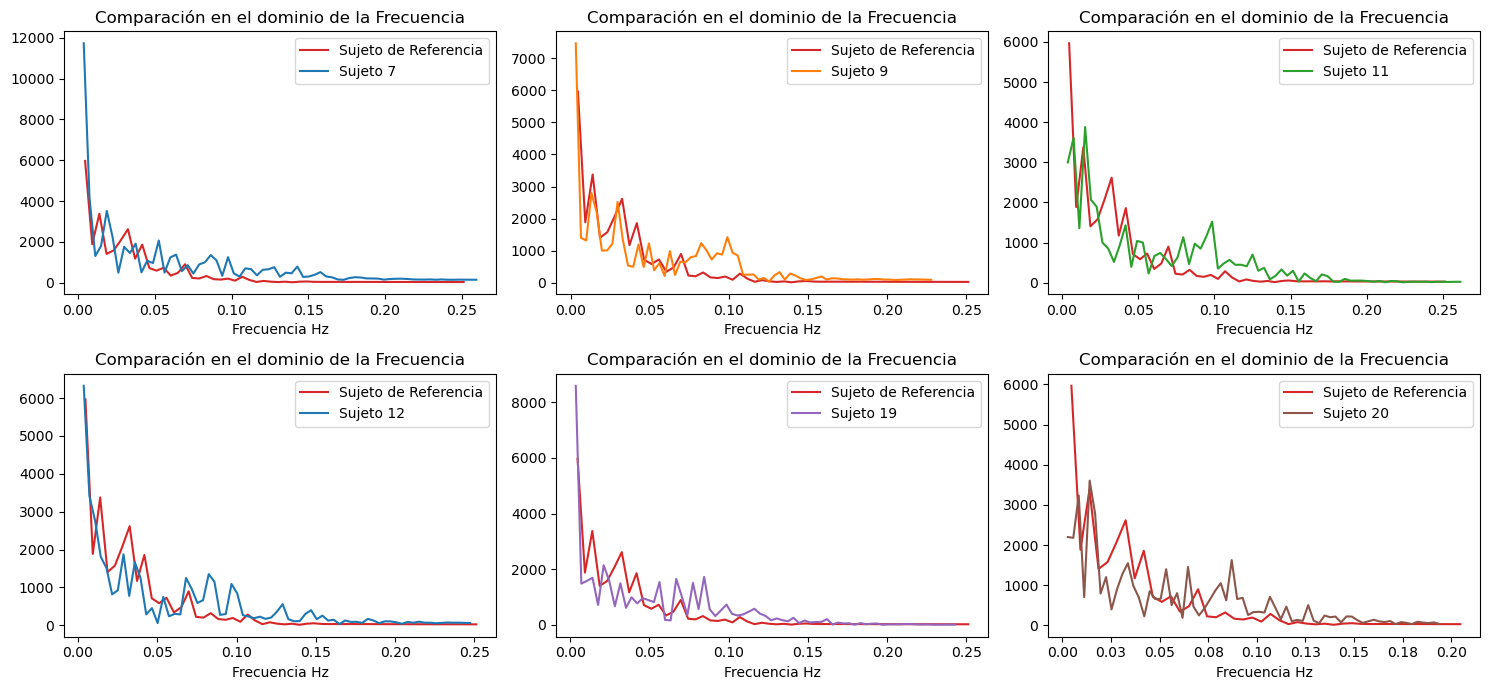

In [18]:
#Crear un subplot de 4 columnas y 2 filas 
fig, axs = plt.subplots(2, 3, figsize=(15,7))

# Asignar datos a cada subplot
axs[0, 0].plot(pf_gs[1:55], mg_gs[1:55], 'tab:red', label = 'Sujeto de Referencia')
axs[0, 0].plot(fft_frecuencias['s7_1_1'][1:70], fft_magnitudes['s7_1_1'][1:70], 'tab:blue', label = 'Sujeto 7')
axs[0, 0].set_title('Comparación en el dominio de la Frecuencia')
axs[0, 0].set_xlabel('Frecuencia Hz')
axs[0, 0].legend()

axs[0, 1].plot(pf_gs[1:55], mg_gs[1:55], 'tab:red', label = 'Sujeto de Referencia')
axs[0, 1].plot(fft_frecuencias['s9_1_1'][1:70], fft_magnitudes['s9_1_1'][1:70], 'tab:orange', label = 'Sujeto 9')
axs[0, 1].set_title('Comparación en el dominio de la Frecuencia')
axs[0, 1].set_xlabel('Frecuencia Hz')
axs[0, 1].legend()

axs[0, 2].plot(pf_gs[1:55], mg_gs[1:55], 'tab:red', label = 'Sujeto de Referencia')
axs[0, 2].plot(fft_frecuencias['s11_1_1'][1:70], fft_magnitudes['s11_1_1'][1:70], 'tab:green', label = 'Sujeto 11')
axs[0, 2].set_title('Comparación en el dominio de la Frecuencia')
axs[0, 2].set_xlabel('Frecuencia Hz')
axs[0, 2].legend()

axs[1, 0].plot(pf_gs[1:55], mg_gs[1:55], 'tab:red', label = 'Sujeto de Referencia')
axs[1, 0].plot(fft_frecuencias['s12_1_1'][1:70], fft_magnitudes['s12_1_1'][1:70], 'tab:blue', label = 'Sujeto 12')
axs[1, 0].set_title('Comparación en el dominio de la Frecuencia')
axs[1, 0].set_xlabel('Frecuencia Hz')
axs[1, 0].legend()

axs[1, 1].plot(pf_gs[1:55], mg_gs[1:55], 'tab:red', label = 'Sujeto de Referencia')
axs[1, 1].plot(fft_frecuencias['s20_1_1'][1:70], fft_magnitudes['s20_1_1'][1:70], 'tab:purple', label = 'Sujeto 19')
axs[1, 1].set_title('Comparación en el dominio de la Frecuencia')
axs[1, 1].set_xlabel('Frecuencia Hz')
axs[1, 1].legend()

axs[1, 2].plot(pf_gs[1:45], mg_gs[1:45], 'tab:red', label = 'Sujeto de Referencia')
axs[1, 2].plot(fft_frecuencias['s19_1_1'][1:70], fft_magnitudes['s19_1_1'][1:70], 'tab:brown', label = 'Sujeto 20')
axs[1, 2].set_title('Comparación en el dominio de la Frecuencia')
axs[1, 2].set_xlabel('Frecuencia Hz')
axs[1, 2].xaxis.set_major_formatter(ticker.FuncFormatter(formato_dos_cifras))
axs[1, 2].legend()

# Ajustar espaciado
plt.tight_layout()

# Mostrar el plot
plt.show()

A partir de los resultados obtenidos mediante el análisis en el dominio de la frecuencia utilizando la Transformada Rápida de Fourier (FFT), se observa que las señales, al compararlas con nuestro Gold Santandard (GS), muestran un desempeño satisfactorio. Específicamente, en el espectro de bajas frecuencias, los sujetos presentan una mayor presencia en las altas frecuencias en comparación con el GS. Esto se evidencia principalmente en frecuencias superiores a los 30 Hz, donde la amplitud de la señal del Grupo de Estudio (GE) es más destacada respecto a cada sujeto. Esta diferencia se puede interpretar como un indicativo de mayor nerviosismo en los participantes, posiblemente debido a que cometieron más errores en las tareas matemáticas propuestas y recibieron retroalimentación negativa. Este factor se considera relevante, ya que pudo incrementar el nerviosismo durante la prueba, elevando la frecuencia cardíaca y, por ende, la presencia de altas frecuencias en el espectro analizado por la FFT.

## *<span style = "color : #01A9DB" >Entropía Espectral</span>*

El análisis por entropía espectral es una técnica avanzada en el análisis de señales que se utiliza para cuantificar el grado de regularidad o previsibilidad en las series temporales, como las señales biométricas o financieras. Se basa en el concepto de entropía, una medida de la incertidumbre o la aleatoriedad en un sistema. La entropía espectral, específicamente, se refiere a la aplicación de conceptos de entropía al espectro de frecuencias de una señal.

**¿Qué es el análisis por entropía espectral?**

El análisis por entropía espectral implica calcular la entropía de la distribución de energía a lo largo del espectro de frecuencias de una señal. Se utiliza para examinar cómo se distribuye la potencia de la señal a través de sus distintas frecuencias y cuánta información o "desorden" contiene esa distribución. En términos más técnicos, la entropía espectral mide la uniformidad de la distribución espectral de una señal: una distribución uniforme indica alta entropía (y, por lo tanto, un comportamiento más complejo y menos predecible), mientras que una concentración de energía en pocas frecuencias indica baja entropía (señalando un comportamiento más regular o predecible).

**¿Para qué sirve?**

El análisis por entropía espectral se utiliza en varios campos para:

* Análisis de señales biomédicas: En cardiología, por ejemplo, se utiliza para evaluar la variabilidad de la frecuencia cardíaca (HRV) y detectar diferentes estados de salud o enfermedad. Una baja entropía espectral en la HRV puede indicar un riesgo más elevado de ciertas condiciones cardíacas.
* Procesamiento de señales y telecomunicaciones: Para caracterizar y mejorar la transmisión de señales, identificando patrones de frecuencia que maximicen la eficiencia de la transmisión o la robustez frente a interferencias.

**Importancia del análisis por entropía espectral**

La importancia del análisis por entropía espectral radica en su capacidad para proporcionar una comprensión profunda de la naturaleza de las señales, más allá de lo que las técnicas tradicionales de análisis de frecuencia pueden ofrecer. Algunas de sus aplicaciones y beneficios incluyen:

Diagnóstico y monitoreo de la salud: Permite identificar cambios sutiles en las señales fisiológicas que pueden indicar

In [19]:
# Normalizar las magnitudes de la señal gold standard para que sumen 1
mg_gs_normalizadas = mg_gs / np.sum(mg_gs)
# Calcular la entropía espectral de la señal gold standard
entropia_gs = -np.sum(mg_gs_normalizadas * np.log(mg_gs_normalizadas + np.finfo(float).eps))  # Se añade un pequeño valor para evitar el log de 0

In [20]:
# Inicializar un diccionario para almacenar la entropía espectral de cada señal
entropias_espectrales = {}

# Iterar sobre el diccionario de magnitudes de la FFT
for clave, magnitudes in fft_magnitudes.items():
    # Normalizar las magnitudes para que sumen 1 (creando una distribución de probabilidad)
    magnitudes_normalizadas = magnitudes / np.sum(magnitudes)
    
    # Calcular la entropía espectral usando la fórmula de la entropía de Shannon
    entropia = -np.sum(magnitudes_normalizadas * np.log(magnitudes_normalizadas + np.finfo(float).eps))  # np.finfo(float).eps previene el log de 0
    
    # Almacenar la entropía espectral en el diccionario
    entropias_espectrales[clave] = entropia

In [21]:
print("==> Entropía Espectral del Sujeto de Referencia: ", entropia_gs, "<==")
print("Entropía Espectral del sujeto 7:", entropias_espectrales['s7_1_1'])
print("Entropía Espectral del sujeto 9:", entropias_espectrales['s9_1_1'])
print("Entropía Espectral del sujeto 11:", entropias_espectrales['s11_1_1'])
print("Entropía Espectral del sujeto 12:", entropias_espectrales['s12_1_1'])
print("Entropía Espectral del sujeto 19:", entropias_espectrales['s19_1_1'])
print("Entropía Espectral del sujeto 20:", entropias_espectrales['s20_1_1'])

==> Entropía Espectral del Sujeto de Referencia:  0.7718747578163987 <==
Entropía Espectral del sujeto 7: 1.3273681134440338
Entropía Espectral del sujeto 9: 1.024497382380357
Entropía Espectral del sujeto 11: 0.914194176307814
Entropía Espectral del sujeto 12: 0.9507043385836986
Entropía Espectral del sujeto 19: 0.8519478152506269
Entropía Espectral del sujeto 20: 0.8697074566938755


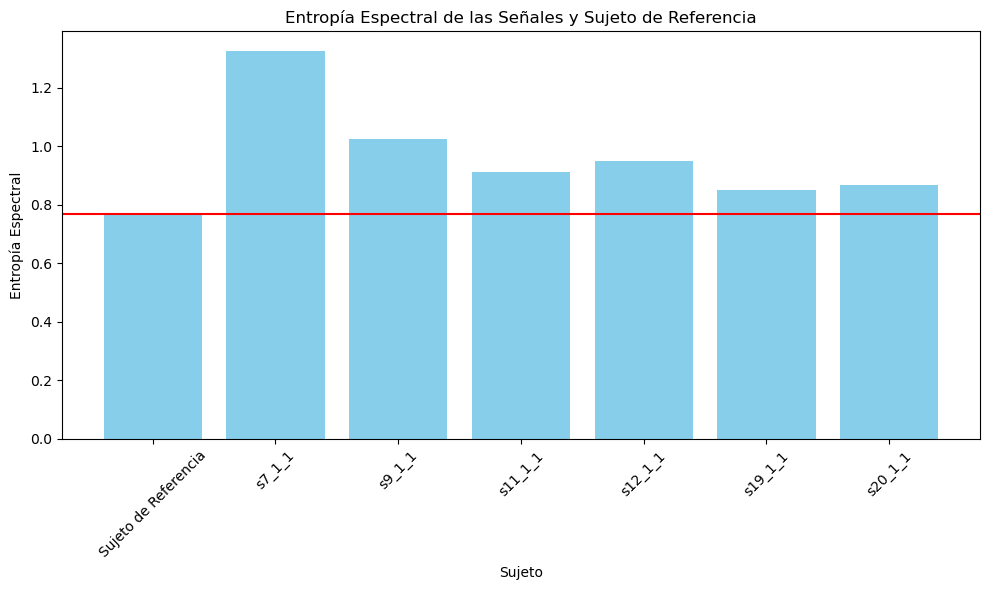

In [35]:
entropias_espectrales['Sujeto de Referencia'] = entropia_gs

# Lista de sujetos específicos y el gold standard para el gráfico
sujetos = ['Sujeto de Referencia', 's7_1_1', 's9_1_1', 's11_1_1', 's12_1_1', 's19_1_1', 's20_1_1']

# Extraer los valores de entropía para los sujetos especificados
valores_entropia = [entropias_espectrales[sujeto] for sujeto in sujetos]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sujetos, valores_entropia, color='skyblue')
plt.xlabel('Sujeto')
plt.ylabel('Entropía Espectral')
plt.axhline(y=0.77, color ='red')
plt.title('Entropía Espectral de las Señales y Sujeto de Referencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La entropía espectral mide la uniformidad de la distribución de la energía a través del espectro de frecuencias de una señal. Una entropía espectral más alta indica que la energía está más uniformemente distribuida entre las diferentes frecuencias, mientras que una entropía más baja sugiere una concentración de energía en menor frecuencias.

* Gold Standard (0.5398477280540532): La entropía espectral más baja del gold standard indica que la energía de su señal está más concentrada en un número menor de frecuencias. Esto podría interpretarse como una señal con características espectrales más definidas o concentradas, lo que podría ser indicativo de un estado más estable o menos variabilidad en la respuesta autonómica del corazón durante el periodo de registro.

* Otros Sujetos (0.6214311970584789 - 0.75831550975038): Las entropías espectrales más altas en las señales de otros sujetos sugieren una distribución más uniforme de la energía a través de un rango más amplio de frecuencias. Esto podría indicar una mayor complejidad en la señal o una variabilidad más alta en la regulación autonómica del corazón. Es posible que estas señales reflejen una mayor adaptabilidad o respuesta a estímulos internos o externos, mostrando así una mayor riqueza de frecuencias activas.

##### **¿Qué Significa Esto?**

* Mayor Entropía No Significa Necesariamente Más Energía: Es importante notar que una entropía espectral más alta no implica que haya "más energía" en la señal en términos absolutos, sino que la energía presente está más equitativamente repartida entre las diversas frecuencias.

* Mayor Presencia de Frecuencias: Las señales con mayor entropía espectral sí indican una presencia más amplia de frecuencias en la señal, lo que sugiere una mayor complejidad o variabilidad en la señal. Esto puede ser interpretado como una característica de las señales HRV de los sujetos que reflejan una diversidad de respuestas fisiológicas o estados autonómicos.

##### **Consideraciones**

* Contexto Fisiológico: Las diferencias en la entropía espectral deben ser interpretadas en el contexto del estado fisiológico del sujeto, la actividad realizada durante la captura de la señal, y cualquier factor que pueda influir en la variabilidad del ritmo cardíaco.

# **<span style="color:#0000FF">3. Análisis de Tiempo-Frecuencia</span>**


## *<span style = "color : #01A9DB" >Transformada de Wavelet</span>*

La Transformada de Wavelet es una herramienta matemática utilizada en el análisis de señales que proporciona una descomposición de la señal en componentes de frecuencia y tiempo simultáneamente. A diferencia de la Transformada de Fourier, que solo ofrece una representación en el dominio de la frecuencia, la Transformada de Wavelet mantiene la información temporal, permitiendo una mejor localización de las características de la señal en el tiempo.

**¿Para qué sirve la Transformada de Wavelet?**

Análisis multirresolución: Permite examinar la señal a diferentes escalas o resoluciones, lo que es particularmente útil para señales no estacionarias cuyas propiedades estadísticas cambian con el tiempo.

Compresión de datos: Ayuda a reducir el tamaño de los archivos de datos al eliminar componentes de la señal que son menos significativos, lo que es esencial para el almacenamiento y transmisión de datos.

Eliminación de ruido: Capaz de aislar y eliminar el ruido de las señales sin comprometer la integridad de la señal original.

Detección y análisis de eventos transitorios: Excelente para identificar y analizar eventos de corta duración en señales complejas.

**Importancia en el análisis de señales fisiológicas**

Las señales fisiológicas, como la Variabilidad de la Frecuencia Cardiaca (HRV), son inherentemente no estacionarias y contienen información importante en múltiples escalas temporales. La Transformada de Wavelet es particularmente útil en este contexto porque:

* Proporciona una visión detallada: Ofrece una visión más detallada y precisa de las dinámicas temporales de las señales fisiológicas, permitiendo la identificación de patrones y características que podrían no ser evidentes en una transformada de Fourier.

* Adaptable a señales no estacionarias: Dado que las señales fisiológicas cambian con el tiempo, la capacidad de la Transformada de Wavelet para adaptarse a tales cambios la hace especialmente valiosa para su análisis.

**Importancia en la detección de nerviosismo en señales de HRV**

En el contexto de detectar nerviosismo mediante el análisis de la HRV:

Detección de cambios sutiles: La Transformada de Wavelet puede ayudar a identificar cambios sutiles en las señales de HRV que están asociados con el nerviosismo, gracias a su capacidad para descomponer la señal en varias escalas de tiempo.

En resumen, la Transformada de Wavelet es una herramienta poderosa en el análisis de señales fisiológicas, proporcionando una comprensión profunda de las dinámicas temporales de estas señales. Su capacidad para identificar cambios asociados con el nerviosismo en la HRV, especialmente cuando se compara con un Gold Standard.

In [23]:
# Función para aplicar un filtro de paso alto
def filtro_paso_alto(senal, frec_corte=0.1, frec_muestreo=250, orden=5):
    nyquist = 0.5 * frec_muestreo
    frec_normalizada = frec_corte / nyquist
    b, a = butter(orden, frec_normalizada, btype='high', analog=False)
    senal_filtrada = filtfilt(b, a, senal)
    return senal_filtrada

In [24]:
# Cargar la señal desde el archivo
sg_gs = np.loadtxt('Datos/gd_1.1.txt')

In [25]:
# Rango de sujetos y número de señales por sujeto
num_sujetos = 21
num_señales = 2

# Diccionario para almacenar las señales
signals = {}

for sujeto in range(1, num_sujetos + 1):
    for señal in range(1, num_señales + 1):
        # Nombre del archivo
        nombre_archivo = f's{sujeto}_1.{señal}.txt'    
        # Construimos el path completo al archivo
        path_completo = f'Datos/{nombre_archivo}'     
        # Leemos la señal y la almacenamos en el diccionario
        signals[f's{sujeto}_1_{señal}'] = np.loadtxt(path_completo, delimiter=',')    

Una vez que ya se cargaron los datos nuevamente y la función de filtrado ya se inicializo vamos a proceder a filtrar todos los los elementos debido a que se conoce que se cuenta con artefactos de ruido en las bajas frecuencias. Por lo que filtramos la señal del Gold Sntandard y posteriormente todo el diccionario donde estan todas las señales.

In [26]:
#Filtrar la señal del GS
frec_corte = 0.1
gs_fil = filtro_paso_alto(sg_gs, frec_corte=frec_corte)

In [27]:
# Diccionario para almacenar las señales filtradas
signals_filtered = {}

for key, signal in signals.items():
    signals_filtered[key] = filtro_paso_alto(signal)

Aplicamos la tranformada de Wavelet a las señales filtradas 

In [28]:
# Definir los parámetros para la CWT
widths = np.arange(1, 128)
# Aplicar CWT a la señal gold standard
cwtmatr, freqs = pywt.cwt(gs_fil, widths, 'morl')
# Calcular el espectro de frecuencia (magnitud de los coeficientes wavelet)
espectro_freq = np.abs(cwtmatr)
# Promediar el espectro de frecuencia a lo largo del tiempo
espectro_freq_promedio = np.mean(espectro_freq, axis=1)

In [29]:
# Diccionarios para almacenar los resultados
espectro_freq_dic = {}
espectro_freq_promedio_dic = {}
freqs_dic = {}
cwtmatr_dic = {}

widths = np.arange(1, 128)

for key, signal in signals_filtered.items():
    # Aplicar CWT a cada señal filtrada
    cwtmatr, freqs = pywt.cwt(signal, widths, 'morl')
    espectro_freq = np.abs(cwtmatr)
    espectro_freq_promedio = np.mean(espectro_freq, axis=1)
    
    # Almacenar los resultados en los diccionarios correspondientes
    espectro_freq_dic[key] = espectro_freq
    espectro_freq_promedio_dic[key] = espectro_freq_promedio
    freqs_dic[key] = freqs
    cwtmatr_dic[key] = cwtmatr

Graficamos el Espectro de la primer señal es que el GS

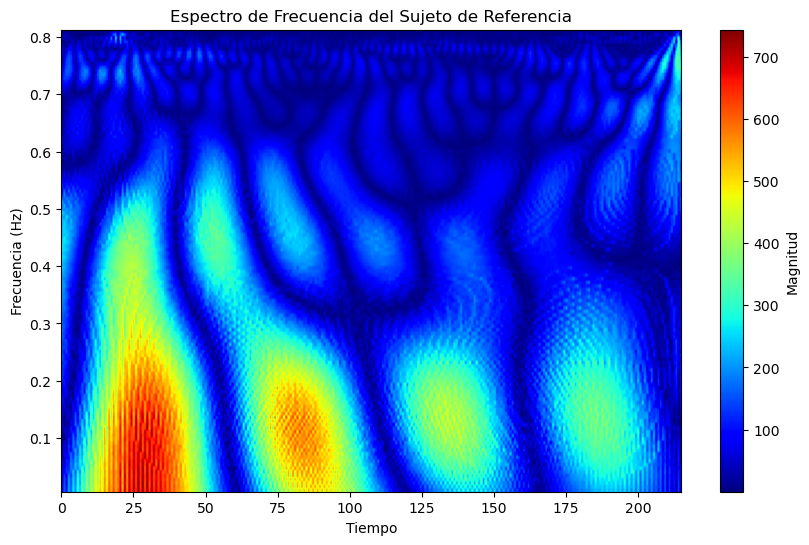

In [30]:
# Gráfico del espectro de frecuencia de la CWT
plt.figure(figsize=(10, 6))
plt.imshow(espectro_freq, extent=[0, len(sg_gs), freqs[-1], freqs[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitud')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectro de Frecuencia del Sujeto de Referencia')
plt.show()

Graficamos el espectro de las señales en el diccionario 

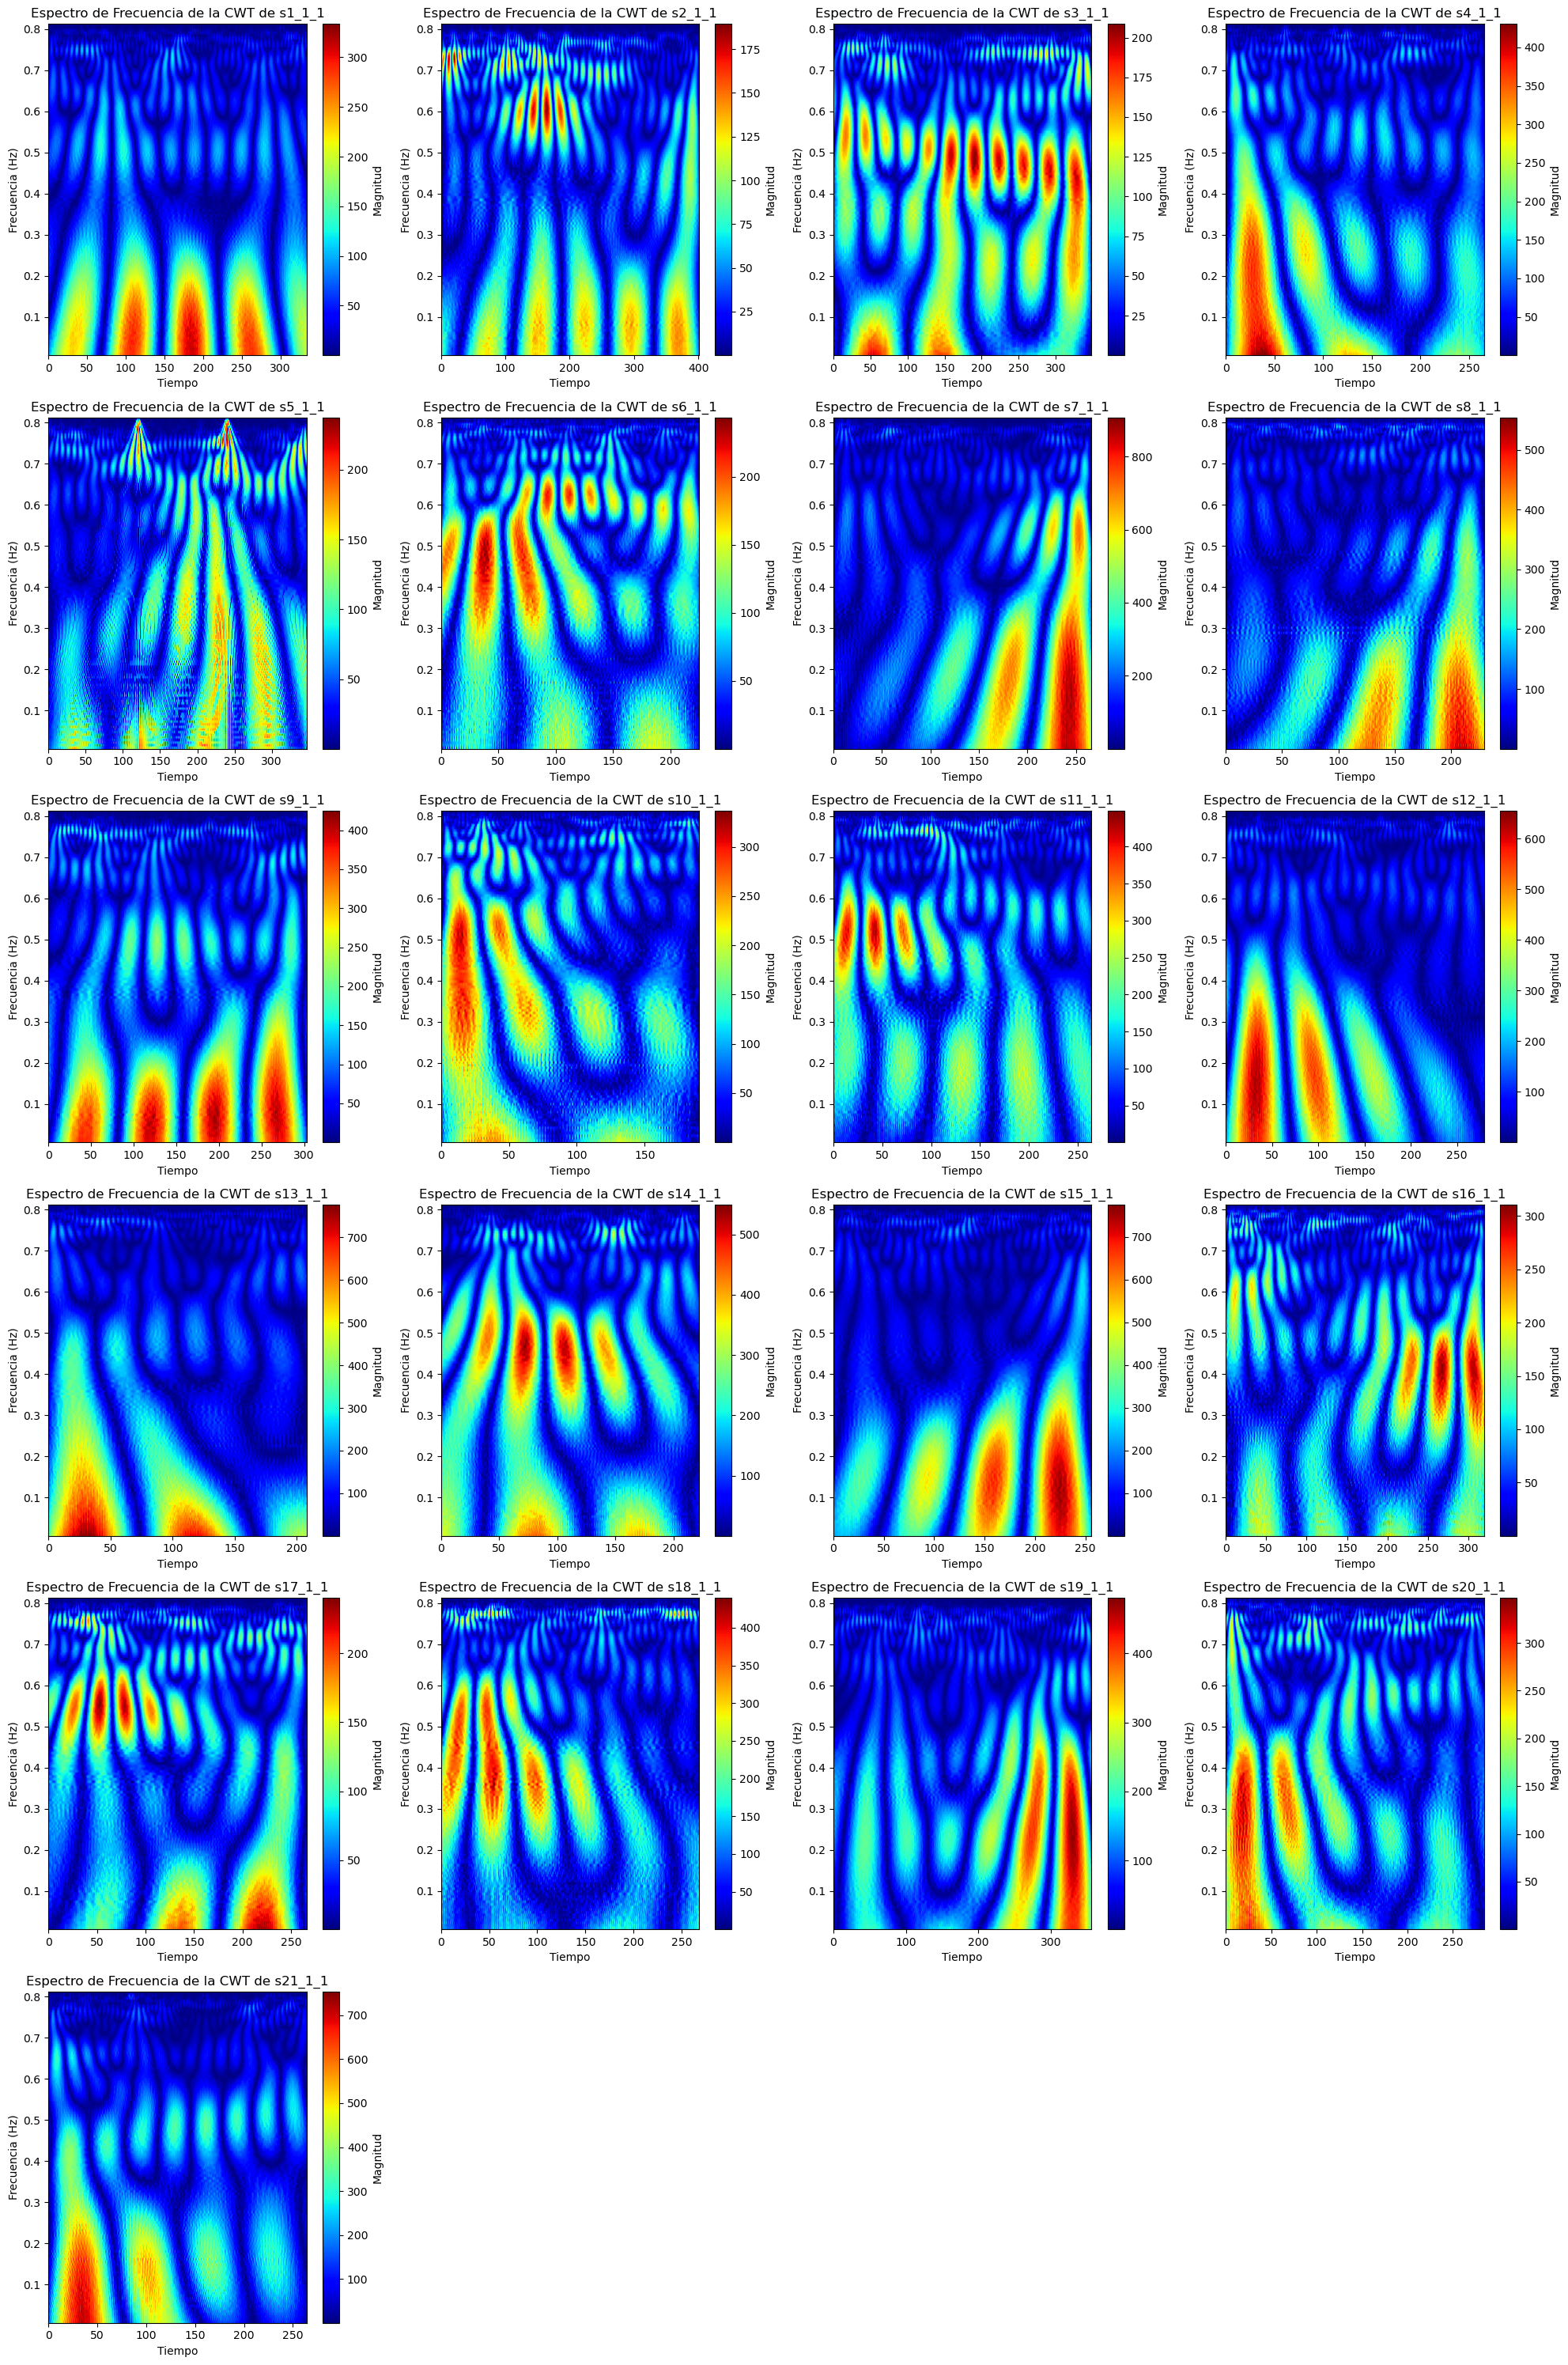

In [31]:
espectros_claves = ['s1_1_1', 's2_1_1', 's3_1_1', 's4_1_1', 's5_1_1', 's6_1_1', 
                    's7_1_1', 's8_1_1', 's9_1_1', 's10_1_1', 's11_1_1', 's12_1_1', 
                    's13_1_1', 's14_1_1', 's15_1_1', 's16_1_1', 's17_1_1', 's18_1_1',
                    's19_1_1', 's20_1_1', 's21_1_1']

# Configuración de la figura para subplots: 4 columnas por 6 filas
fig, axs = plt.subplots(6, 4, figsize=(20, 30)) 
axs = axs.flatten() 

for i, clave in enumerate(espectros_claves):
    if clave in espectro_freq_dic and clave in freqs_dic and clave in signals:
        espectro_freq = espectro_freq_dic[clave]
        freqs = freqs_dic[clave]
        signal_length = len(signals[clave])
        
        ax = axs[i]  # Selecciona el subplot correspondiente
        
        cax = ax.imshow(espectro_freq, extent=[0, signal_length, freqs[-1], freqs[0]], cmap='jet', aspect='auto')
        fig.colorbar(cax, ax=ax, label='Magnitud')
        ax.set_xlabel('Tiempo')
        ax.set_ylabel('Frecuencia (Hz)')
        ax.set_title(f'Espectro de Frecuencia de la CWT de {clave}')

# Ocultar los ejes de los subplots no utilizados
for j in range(i+1, 24):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


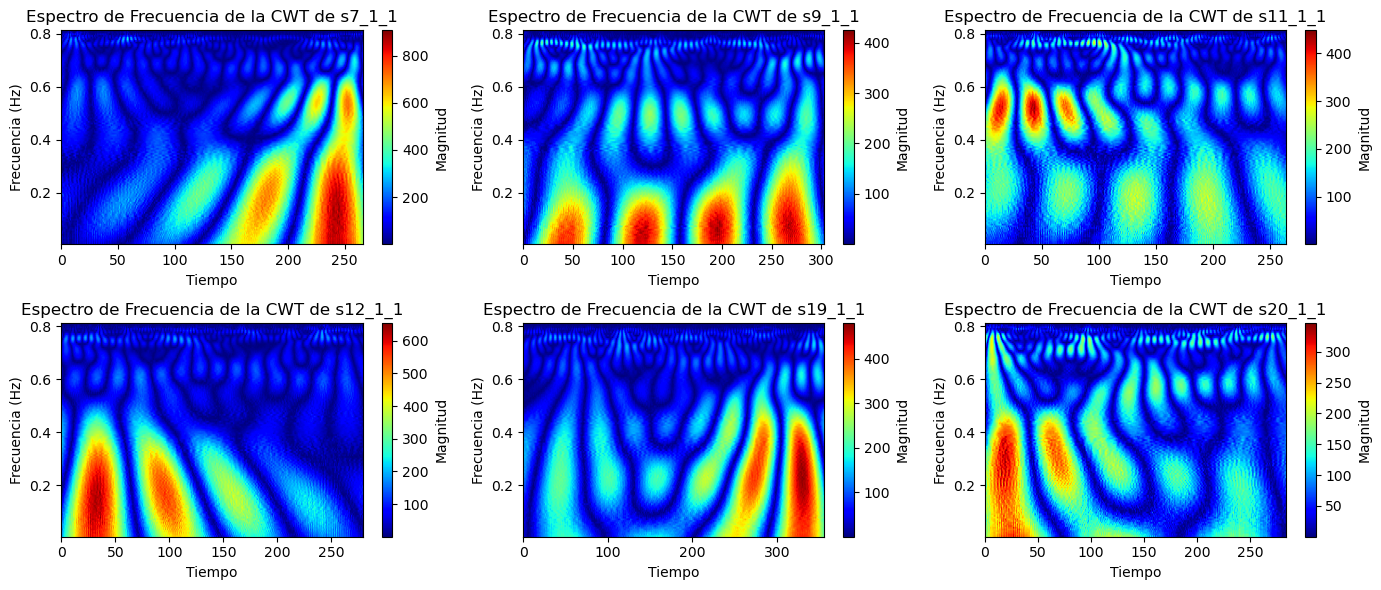

In [32]:
espectros_claves = ['s7_1_1', 's9_1_1','s11_1_1', 's12_1_1', 's19_1_1', 's20_1_1']

# Configuración de la figura para subplots: 4 columnas por 6 filas
fig, axs = plt.subplots(2, 3, figsize=(14, 6))  
axs = axs.flatten()  # Hacemos 'flatten' para poder iterar más fácilmente sobre cada subplot

for i, clave in enumerate(espectros_claves):
    if clave in espectro_freq_dic and clave in freqs_dic and clave in signals:
        espectro_freq = espectro_freq_dic[clave]
        freqs = freqs_dic[clave]
        signal_length = len(signals[clave])
        
        ax = axs[i]  # Selecciona el subplot correspondiente
        
        cax = ax.imshow(espectro_freq, extent=[0, signal_length, freqs[-1], freqs[0]], cmap='jet', aspect='auto')
        fig.colorbar(cax, ax=ax, label='Magnitud')
        ax.set_xlabel('Tiempo')
        ax.set_ylabel('Frecuencia (Hz)')
        ax.set_title(f'Espectro de Frecuencia de la CWT de {clave}')

# Ocultar los ejes de los subplots no utilizados
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


Estas gráficas representan espectrogramas de la transformada de wavelet continua (CWT) de varias señales, respuestas fisiológicas durante una tarea matemática. La interpretación de estos espectrogramas puede ofrecer características sobre la dinámica temporal de las frecuencias durante la actividad o el estado de los sujetos en el estudio.

Gold Standard (esquina superior izquierda): Esta señal sirve como referencia y muestra una distribución de frecuencias con una magnitud intensa (colores cálidos) en una banda específica y sobre un intervalo de tiempo continuo. Esto puede indicar una respuesta estable y uniforme a lo largo del tiempo, lo que sería esperado si el sujeto está concentrado y responde correctamente a las preguntas sin estrés.

Sujetos (resto de gráficas): Cada una de las gráficas de los sujetos muestra variaciones en el tiempo y en las frecuencias. La presencia de colores cálidos en áreas similares al gold standard podría indicar momentos de alta concentración o actividad mental similar a la del gold standard. Por otro lado, la presencia de áreas azules (menor magnitud) o patrones diferentes sugiere variabilidad en la respuesta, que podría asociarse con errores o nerviosismo.

# **<span style="color:#0000FF">4. Conclusiones</span>**

Los resultados presentados ofrecen una comprensión profunda de cómo las variaciones en las señales de frecuencia cardíaca pueden reflejar los estados emocionales o fisiológicos de los sujetos, particularmente en respuesta a situaciones de estrés o nerviosismo. A través de las comparaciones con un Gold Standard, se evidencian diferencias significativas en la suavidad de las señales, la eliminación de offset, y más notablemente, en la distribución y presencia de frecuencias altas. Estas diferencias sugieren que el análisis en el dominio de la frecuencia, especialmente mediante la Transformada Rápida de Fourier (FFT) y la entropía espectral, es una herramienta valiosa para detectar cambios sutiles en el estado emocional de los sujetos.

El aumento de la presencia de altas frecuencias y una mayor entropía espectral en los sujetos en comparación con el Gold Standard indica un mayor nivel de nerviosismo, posiblemente debido a la realización de tareas bajo presión o la recepción de retroalimentación negativa. Este fenómeno refleja una mayor variabilidad y complejidad en la señal de variabilidad de la frecuencia cardíaca (HRV), sugiriendo una adaptabilidad o respuesta más dinámica a estímulos internos o externos.

La interpretación de los espectrogramas de la transformada de wavelet continua (CWT) proporciona una perspectiva adicional sobre la dinámica temporal de las frecuencias durante actividades específicas. Las variaciones en los patrones de frecuencia entre el Gold Standard y los sujetos subrayan la influencia de factores como el estrés, la concentración y el nerviosismo en las respuestas fisiológicas durante tareas demandantes.

En conclusión, estos análisis subrayan la importancia de considerar la complejidad y variabilidad de las señales HRV en el contexto de estudios fisiológicos y psicológicos. Los resultados no solo demuestran la capacidad de la tecnología de análisis de frecuencias para detectar cambios sutiles en el estado emocional de los individuos, sino que también destacan la necesidad de interpretar estas variaciones en el contexto más amplio de la actividad del sujeto y las respuestas autonómicas. Este enfoque holístico hacia la interpretación de las señales fisiológicas abre nuevas vías para entender mejor las respuestas humanas a diferentes estímulos y situaciones, ofreciendo implicaciones potenciales para áreas como la monitorización del bienestar, la psicología y la medicina conductual.